In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import cv2
from os import listdir
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2022-04-25 03:50:00.908035: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
base_dir = '/kaggle/input/plant-dataset/Dataset/'

In [3]:
leaf_classs = os.listdir(base_dir)
leaf_classs

['Tomato___healthy',
 'Grape___healthy',
 'Soybean___healthy',
 'Potato___healthy',
 'Peach___healthy',
 'Blueberry___healthy',
 'Pepper,_bell___healthy',
 'Strawberry___healthy',
 'Apple___healthy',
 'Cherry_(including_sour)___healthy',
 'Raspberry___healthy',
 'Corn_(maize)___healthy']

In [4]:
print("Total Plant classes are: {}".format(len(leaf_classs)))

Total Plant classes are: 12


In [5]:
nums = {}
for plant in leaf_classs:
    nums[plant] = len(os.listdir(base_dir + '/' + plant))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Tomato___healthy,2407
Grape___healthy,2115
Soybean___healthy,2527
Potato___healthy,2280
Peach___healthy,2160
Blueberry___healthy,2270
"Pepper,_bell___healthy",2485
Strawberry___healthy,2280
Apple___healthy,2510
Cherry_(including_sour)___healthy,2282


In [6]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 

In [7]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)#1. means float values upto 255 pixels 
train_data=train_gen.flow_from_directory('/kaggle/input/plant-dataset/Dataset/',target_size=(64,64)
                                         ,batch_size=32,class_mode='categorical',shuffle=True,subset='training')

Found 22295 images belonging to 12 classes.


In [8]:
test_data=train_gen.flow_from_directory('/kaggle/input/plant-dataset/Dataset/',target_size=(64,64),
                                        batch_size=1,shuffle=False,subset='validation')

Found 5571 images belonging to 12 classes.


In [9]:
train_data.classes

array([ 0,  0,  0, ..., 11, 11, 11], dtype=int32)

In [10]:
train_data.class_indices

{'Apple___healthy': 0,
 'Blueberry___healthy': 1,
 'Cherry_(including_sour)___healthy': 2,
 'Corn_(maize)___healthy': 3,
 'Grape___healthy': 4,
 'Peach___healthy': 5,
 'Pepper,_bell___healthy': 6,
 'Potato___healthy': 7,
 'Raspberry___healthy': 8,
 'Soybean___healthy': 9,
 'Strawberry___healthy': 10,
 'Tomato___healthy': 11}

In [11]:
EPOCHS = 200
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '../input/plantvillage/'
width=256
height=256
depth=3

In [12]:
from tensorflow.keras.preprocessing.image import img_to_array

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [13]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = os.listdir(base_dir)
    print(root_dir)
    
    for plant_folder in root_dir :
        print(f"[INFO] Processing {plant_folder} ...")
        plant_disease_image_list = os.listdir(base_dir + plant_folder)
        #print(plant_image_folder_list)

        for image in plant_disease_image_list[:200]:
            image_directory = f"{base_dir}/{plant_folder}/{image}"
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:                    
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_folder)
                    
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
['Tomato___healthy', 'Grape___healthy', 'Soybean___healthy', 'Potato___healthy', 'Peach___healthy', 'Blueberry___healthy', 'Pepper,_bell___healthy', 'Strawberry___healthy', 'Apple___healthy', 'Cherry_(including_sour)___healthy', 'Raspberry___healthy', 'Corn_(maize)___healthy']
[INFO] Processing Tomato___healthy ...
[INFO] Processing Grape___healthy ...
[INFO] Processing Soybean___healthy ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Blueberry___healthy ...
[INFO] Processing Pepper,_bell___healthy ...
[INFO] Processing Strawberry___healthy ...
[INFO] Processing Apple___healthy ...
[INFO] Processing Cherry_(including_sour)___healthy ...
[INFO] Processing Raspberry___healthy ...
[INFO] Processing Corn_(maize)___healthy ...
[INFO] Image loading completed


In [14]:
image_size = len(image_list)

In [15]:
image_size

2400

In [16]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [17]:
print(label_binarizer.classes_)

['Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___healthy' 'Corn_(maize)___healthy'
 'Grape___healthy' 'Peach___healthy' 'Pepper,_bell___healthy'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Strawberry___healthy' 'Tomato___healthy']


In [18]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [19]:
np_image_list

array([[[[0.56   , 0.542  , 0.569  ],
         [0.7334 , 0.7153 , 0.742  ],
         [0.6533 , 0.6357 , 0.662  ],
         ...,
         [0.662  , 0.6313 , 0.6533 ],
         [0.7734 , 0.742  , 0.7646 ],
         [0.8623 , 0.831  , 0.8535 ]],

        [[0.729  , 0.711  , 0.738  ],
         [0.6445 , 0.6265 , 0.6533 ],
         [0.5913 , 0.573  , 0.6    ],
         ...,
         [0.778  , 0.7466 , 0.769  ],
         [0.84   , 0.809  , 0.831  ],
         [0.92   , 0.8887 , 0.911  ]],

        [[0.6533 , 0.6357 , 0.662  ],
         [0.533  , 0.5156 , 0.542  ],
         [0.569  , 0.5513 , 0.5776 ],
         ...,
         [0.5376 , 0.507  , 0.529  ],
         [0.6    , 0.569  , 0.5913 ],
         [0.951  , 0.92   , 0.9424 ]],

        ...,

        [[0.511  , 0.4934 , 0.547  ],
         [0.48   , 0.4622 , 0.5156 ],
         [0.3467 , 0.3289 , 0.3823 ],
         ...,
         [0.4622 , 0.4268 , 0.4756 ],
         [0.4934 , 0.4578 , 0.507  ],
         [0.4622 , 0.4268 , 0.4756 ]],

        [[

In [20]:
image_labels

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
from sklearn.model_selection import train_test_split
print("[INFO] Spliting data to train, test")
x_train, x_test_temp, y_train, y_test_temp = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [22]:
print("[INFO] Spliting data to test, valid")
x_valid, x_test, y_valid, y_test = train_test_split(x_test_temp, y_test_temp, test_size=0.5, random_state = 42) 

[INFO] Spliting data to test, valid


In [23]:
x_train.shape , x_test.shape , x_valid.shape

((1920, 256, 256, 3), (240, 256, 256, 3), (240, 256, 256, 3))

In [24]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [25]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

2022-04-25 03:50:54.880584: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-25 03:50:54.884439: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-25 03:50:54.946319: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-25 03:50:54.947451: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-04-25 03:50:54.947537: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-04-25 03:50:54.997405: I tensorflow/stream_executor/platform/def

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 85, 85, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 85, 85, 64)        2

In [27]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [28]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_valid, y_valid),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-04-25 03:50:59.974749: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-25 03:50:59.979951: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz


Epoch 1/200


2022-04-25 03:51:01.250123: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-04-25 03:51:02.261159: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-04-25 03:51:02.314294: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


60/60 [==============================] - 36s 461ms/step - loss: 0.8085 - accuracy: 0.4250 - val_loss: 1.0635 - val_accuracy: 0.0583
Epoch 2/200
60/60 [==============================] - 26s 439ms/step - loss: 0.3348 - accuracy: 0.5961 - val_loss: 0.5269 - val_accuracy: 0.0583
Epoch 3/200
60/60 [==============================] - 26s 439ms/step - loss: 0.1513 - accuracy: 0.7554 - val_loss: 0.4468 - val_accuracy: 0.0583
Epoch 4/200
60/60 [==============================] - 26s 437ms/step - loss: 0.1074 - accuracy: 0.7975 - val_loss: 0.4162 - val_accuracy: 0.2083
Epoch 5/200
60/60 [==============================] - 26s 433ms/step - loss: 0.0904 - accuracy: 0.8155 - val_loss: 0.4597 - val_accuracy: 0.2167
Epoch 6/200
60/60 [==============================] - 27s 446ms/step - loss: 0.0741 - accuracy: 0.8669 - val_loss: 0.8011 - val_accuracy: 0.0917
Epoch 7/200
60/60 [==============================] - 27s 443ms/step - loss: 0.0807 - accuracy: 0.8470 - val_loss: 0.3882 - val_accuracy: 0.3625
Epoc

In [29]:
history.history

{'loss': [0.6300286054611206,
  0.2736230790615082,
  0.1398060917854309,
  0.102592833340168,
  0.08846824616193771,
  0.07601930946111679,
  0.0778428167104721,
  0.0634792149066925,
  0.056667961180210114,
  0.05154966935515404,
  0.05583004653453827,
  0.039774227887392044,
  0.048267628997564316,
  0.04742935672402382,
  0.04348652809858322,
  0.037114065140485764,
  0.034301407635211945,
  0.02811264619231224,
  0.033088963478803635,
  0.029812518507242203,
  0.03250117972493172,
  0.03483692929148674,
  0.025460511445999146,
  0.023608338087797165,
  0.023297937586903572,
  0.020109759643673897,
  0.02309204265475273,
  0.020204372704029083,
  0.022071518003940582,
  0.01987065002322197,
  0.018489612266421318,
  0.02238869108259678,
  0.020530886948108673,
  0.023350007832050323,
  0.016696244478225708,
  0.015792859718203545,
  0.01751505397260189,
  0.017670059576630592,
  0.0173319224268198,
  0.014199587516486645,
  0.012690606527030468,
  0.013009512796998024,
  0.01723005

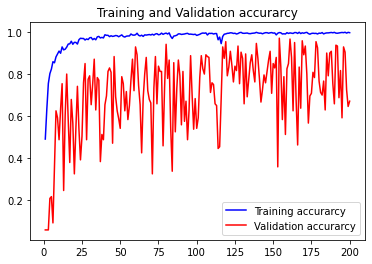

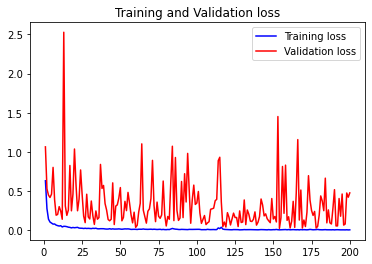

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [31]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
8/8 [==============================] - 0s 19ms/step - loss: 0.4746 - accuracy: 0.6167
Test Accuracy: 61.666667461395264


In [32]:
from tensorflow.keras.models import load_model

model.save('my_model.h5') 

In [33]:
#from tensorflow import keras
#model = keras.models.load_model('/kaggle/input/my-model/my_model.h5')

In [34]:
predicted = model.predict(x_test)
predicted

array([[9.99997139e-01, 1.45568607e-16, 4.24729510e-15, ...,
        9.10717573e-13, 1.10994560e-13, 5.25195790e-11],
       [1.04906000e-13, 1.45211701e-18, 1.87398905e-18, ...,
        9.97881807e-15, 6.10861798e-14, 7.77258986e-12],
       [9.98872682e-04, 1.98152064e-10, 5.19036094e-13, ...,
        3.40005215e-07, 3.93443500e-08, 5.46739420e-06],
       ...,
       [1.08933090e-30, 1.30751630e-26, 1.07913375e-26, ...,
        2.18705219e-30, 2.65858747e-22, 3.90347240e-29],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.03443419e-24, 0.00000000e+00, 1.00000000e+00],
       [5.59024275e-17, 3.08059479e-14, 5.70114333e-20, ...,
        3.05961528e-13, 3.84260574e-07, 9.99996305e-01]], dtype=float32)

In [35]:
truth = y_test
truth

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [36]:
predicted_temp = predicted
predicted[0]

array([9.9999714e-01, 1.4556861e-16, 4.2472951e-15, 2.1072115e-16,
       8.0558699e-13, 4.0729417e-17, 1.7514684e-11, 8.7082132e-13,
       2.8799598e-06, 9.1071757e-13, 1.1099456e-13, 5.2519579e-11],
      dtype=float32)

In [37]:
len(predicted)

240

In [38]:
for i in range(0,240):
    for j in range(0,12):
        if(predicted[i][j] >= 0.5):
            predicted_temp[i][j] = 1
        else:
            predicted_temp[i][j] = 0
            
predicted_temp

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [39]:
predictions = label_binarizer.inverse_transform(predicted_temp)

In [40]:
truths = label_binarizer.inverse_transform(truth)

In [41]:
predictions.shape

(240,)

In [42]:
truths.shape

(240,)

In [43]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (20,20), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

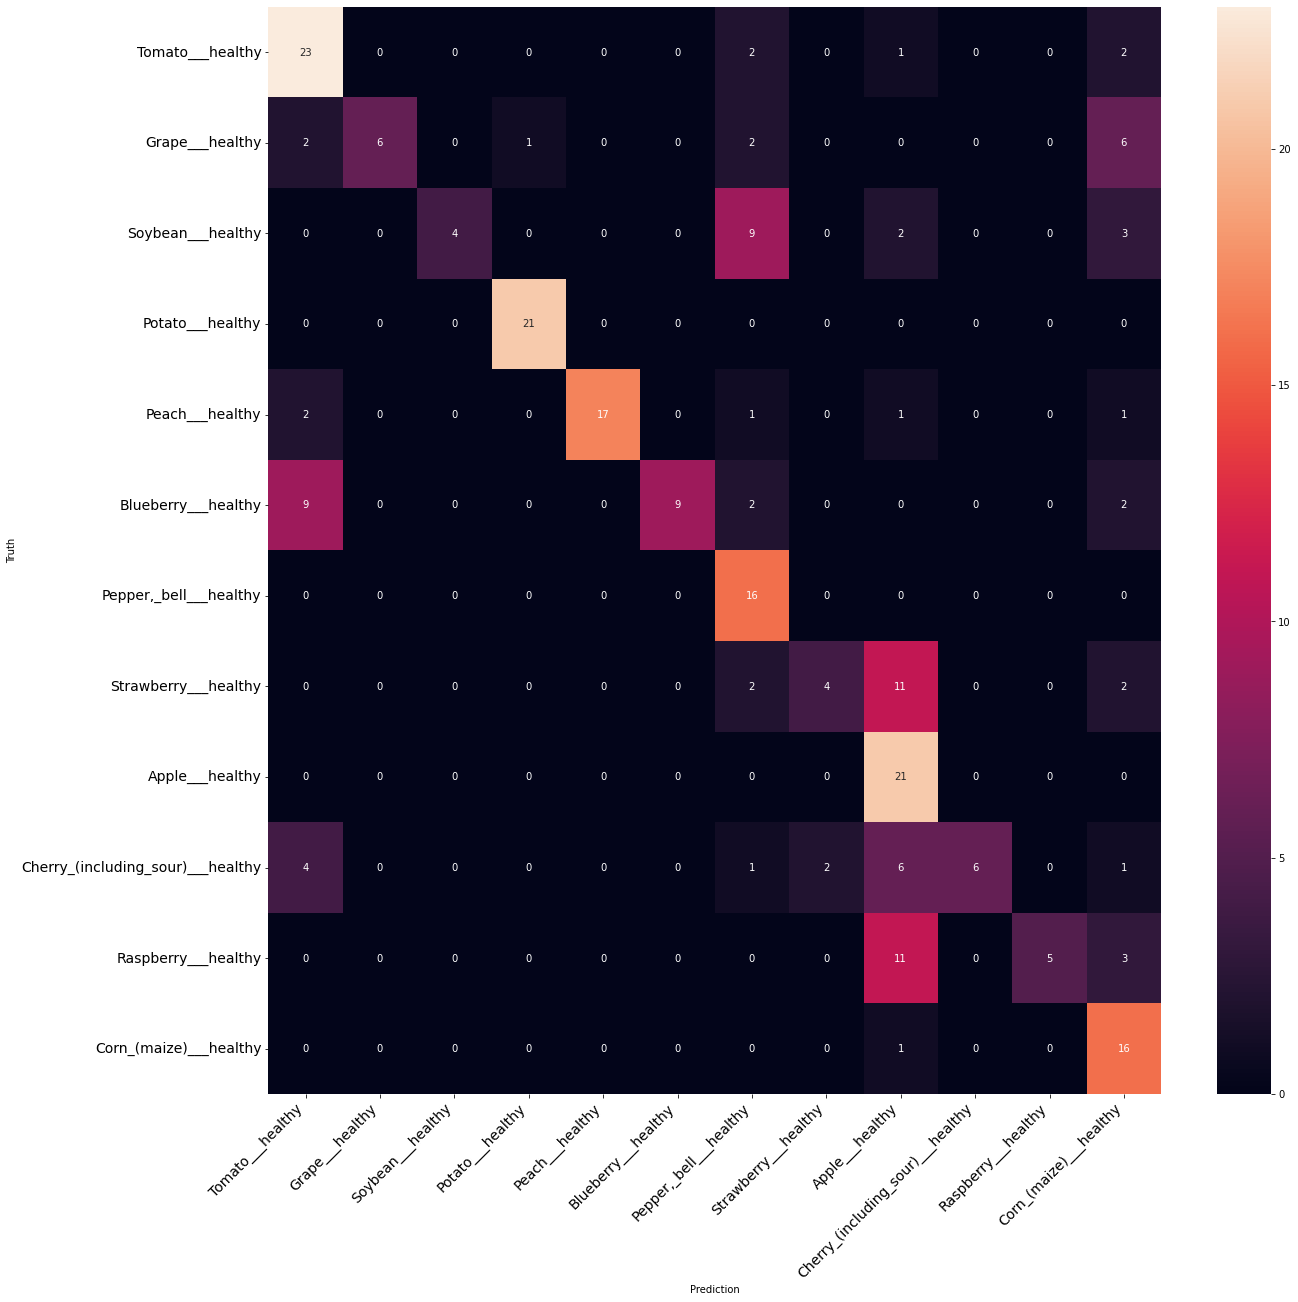

In [44]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd
import seaborn as sns

cm = confusion_matrix(truths,predictions)
print_confusion_matrix(cm,leaf_classs)

In [45]:
leaf_classs

['Tomato___healthy',
 'Grape___healthy',
 'Soybean___healthy',
 'Potato___healthy',
 'Peach___healthy',
 'Blueberry___healthy',
 'Pepper,_bell___healthy',
 'Strawberry___healthy',
 'Apple___healthy',
 'Cherry_(including_sour)___healthy',
 'Raspberry___healthy',
 'Corn_(maize)___healthy']

In [46]:
print(classification_report(truths, predictions))

                                   precision    recall  f1-score   support

                  Apple___healthy       0.57      0.82      0.68        28
              Blueberry___healthy       1.00      0.35      0.52        17
Cherry_(including_sour)___healthy       1.00      0.22      0.36        18
           Corn_(maize)___healthy       0.95      1.00      0.98        21
                  Grape___healthy       1.00      0.77      0.87        22
                  Peach___healthy       1.00      0.41      0.58        22
           Pepper,_bell___healthy       0.46      1.00      0.63        16
                 Potato___healthy       0.67      0.21      0.32        19
              Raspberry___healthy       0.39      1.00      0.56        21
                Soybean___healthy       1.00      0.30      0.46        20
             Strawberry___healthy       1.00      0.26      0.42        19
                 Tomato___healthy       0.44      0.94      0.60        17

                       